# DMML exam: 2023-09-20

The **objective of the exercise is to discriminate between healthy and diseased patients (info derived from attribute "Category")**, based on certain information and measurements included in the dataset.


- Age;
- Sex: (M) Male or (F) Female;
- Laboratyory data:
    - Albumin (ALB);
    - Alkaline phosphatase (ALP);
    - Alanine amino-transferase (ALT);
    - Aspartate amino-transferase (AST); 
    - Bilirubin (BIL);
    - Choline esterase (CHE);
    - Cholesterol level (CHOL);
    - Creatinine blood (CREA);
    - $\gamma$-glutamyl-transferase (GGT);
    - Protein (PROT)


# Instructions summary
1. Import the *HepatitisCdata.csv* dataset
2. Perform an **exploratory analysis**:
    - Report and discuss the results of the analysis   
3. Perform the required data preprocessing steps:
    - Obtain a numeric representation of the categorical variables
4. Create a new target column "**Class**" as follows: (binary attribute representing healthy and diseased patient)
    - '0=Blood Donor': 0 --> healthy
    - '0s=suspect Blood Donor': 0 --> healthy 
    - '1=Hepatitis': 1 --> diseased
    - '2=Fibrosis': 1 --> diseased
    - '3=Cirrhosis': 1 --> diseased


5. Carry out a **classification analysis** aimed at predicting the **Class** value (healthy or diseased) considering the following setting:
    - Apply a 5-fold cross-validation procedure on the dataset to identify the most suitable classifier among the following:
        - DecisionTree classifier (default parameters)
        - RandomForest classifier (default parameters)
        - RandomForest classifier (default parameters) after rebalancing with RandomOverSampler 
    - Report and discuss the results, motivating the choice of the most suitable model

# Exam Delivery
- Save the current file 
- Click "**Restart & Run All**" and check consistency (no error, expected results)
- Export using
     - "**File**" --> "**Download as**" --> "**HTML (.html)**"
- Rename the files as follows and upload in MS Teams Assignment
     - HTML: *Surname_Name_StudentNumber.html*
     - IPYNB: *Surname_Name_StudentNumber.ipynb* 
     
# Code of conduct
- You can consult the course material (notebooks and slides)
- You can consult the official documentation of the libraries
- Any form of information leakage between candidates is not allowed: if this is ascertained, exam failure is automatic.

# 1. Import the *HepatitisCdata.csv* dataset

In [1]:
# TODO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import jaccard_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist
from pandas.plotting import scatter_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier

In [2]:
df= pd.read_csv('HepatitisCdata.csv')

In [3]:
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


# 2. Perform an **exploratory analysis**
- Report and discuss the results of the analysis.



In [6]:
# TODO 
df.shape

(615, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [8]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [9]:
df.describe(include='object')

,Category,Sex
count,615,615
unique,5,2
top,0=Blood Donor,m
freq,533,377


In [10]:
nominal= ['Sex']
numerical= list((set(df)-set(nominal))- set(['Category']))

In [11]:
numerical

['ALP',
 'Age',
 'CHE',
 'ALB',
 'CHOL',
 'CREA',
 'ALT',
 'AST',
 'PROT',
 'GGT',
 'BIL']

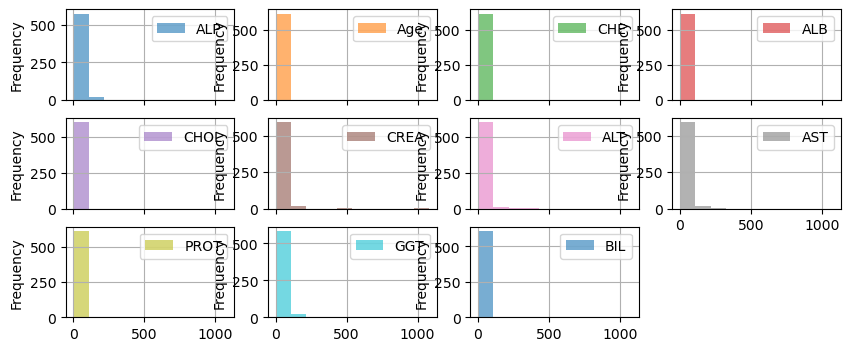

In [12]:
df[numerical].plot(kind='hist',
                  alpha=0.6,
                  grid=True,
                  figsize=(10,4),
                  layout= (3,4),
                  subplots=True)
plt.show()

In [13]:
df[numerical].corr()

,ALP,Age,CHE,ALB,CHOL,CREA,ALT,AST,PROT,GGT,BIL
ALP,1.000000,0.173340,0.033753,-0.141584,0.125429,0.149832,0.214480,0.063948,-0.055109,0.454630,0.056078
Age,0.173340,1.000000,-0.075093,-0.197498,0.125641,-0.022296,-0.006021,0.088666,-0.153668,0.153087,0.032492
CHE,0.033753,-0.075093,1.000000,0.375878,0.425456,-0.011157,0.147000,-0.208536,0.295427,-0.110345,-0.333172
ALB,-0.141584,-0.197498,0.375878,1.000000,0.208248,-0.001573,0.001606,-0.193450,0.557197,-0.155749,-0.221651
CHOL,0.125429,0.125641,0.425456,0.208248,1.000000,-0.047744,0.068947,-0.209970,0.207071,-0.006895,-0.180370
CREA,0.149832,-0.022296,-0.011157,-0.001573,-0.047744,1.000000,-0.043025,-0.021387,-0.031704,0.121003,0.031224
ALT,0.214480,-0.006021,0.147000,0.001606,0.068947,-0.043025,1.000000,0.273326,0.094730,0.248114,-0.038469
AST,0.063948,0.088666,-0.208536,-0.193450,-0.209970,-0.021387,0.273326,1.000000,0.040071,0.491263,0.312231
PROT,-0.055109,-0.153668,0.295427,0.557197,0.207071,-0.031704,0.094730,0.040071,1.000000,-0.011767,-0.047638
GGT,0.454630,0.153087,-0.110345,-0.155749,-0.006895,0.121003,0.248114,0.491263,-0.011767,1.000000,0.217024


<Axes: >

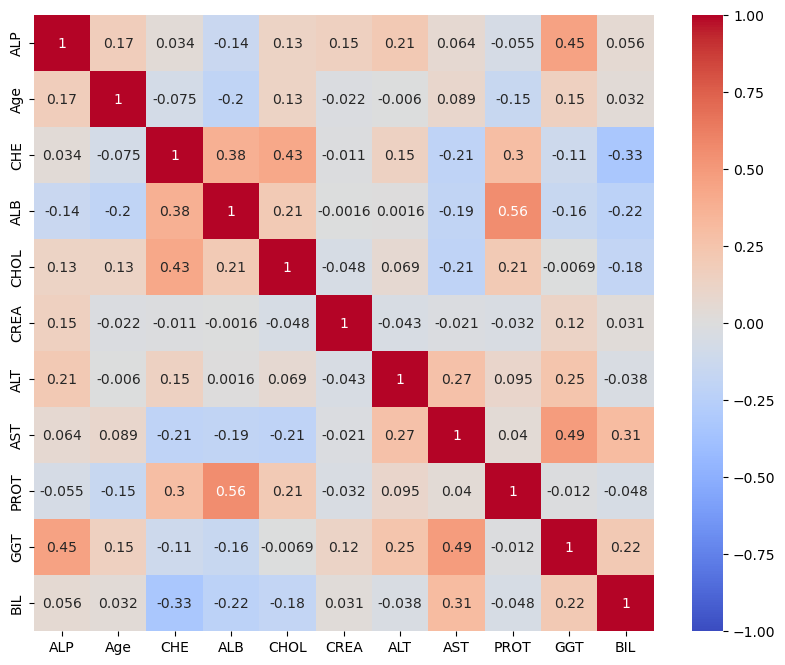

In [14]:
plt.figure(figsize= (10, 8))
sns.heatmap(df[numerical].corr(), annot = True, vmin=-1, vmax=1,cmap = "coolwarm")

I don't see any strong correlation (neither positive nor negative) between the numerical variables. Every one seems to have a different impact on the target variable.

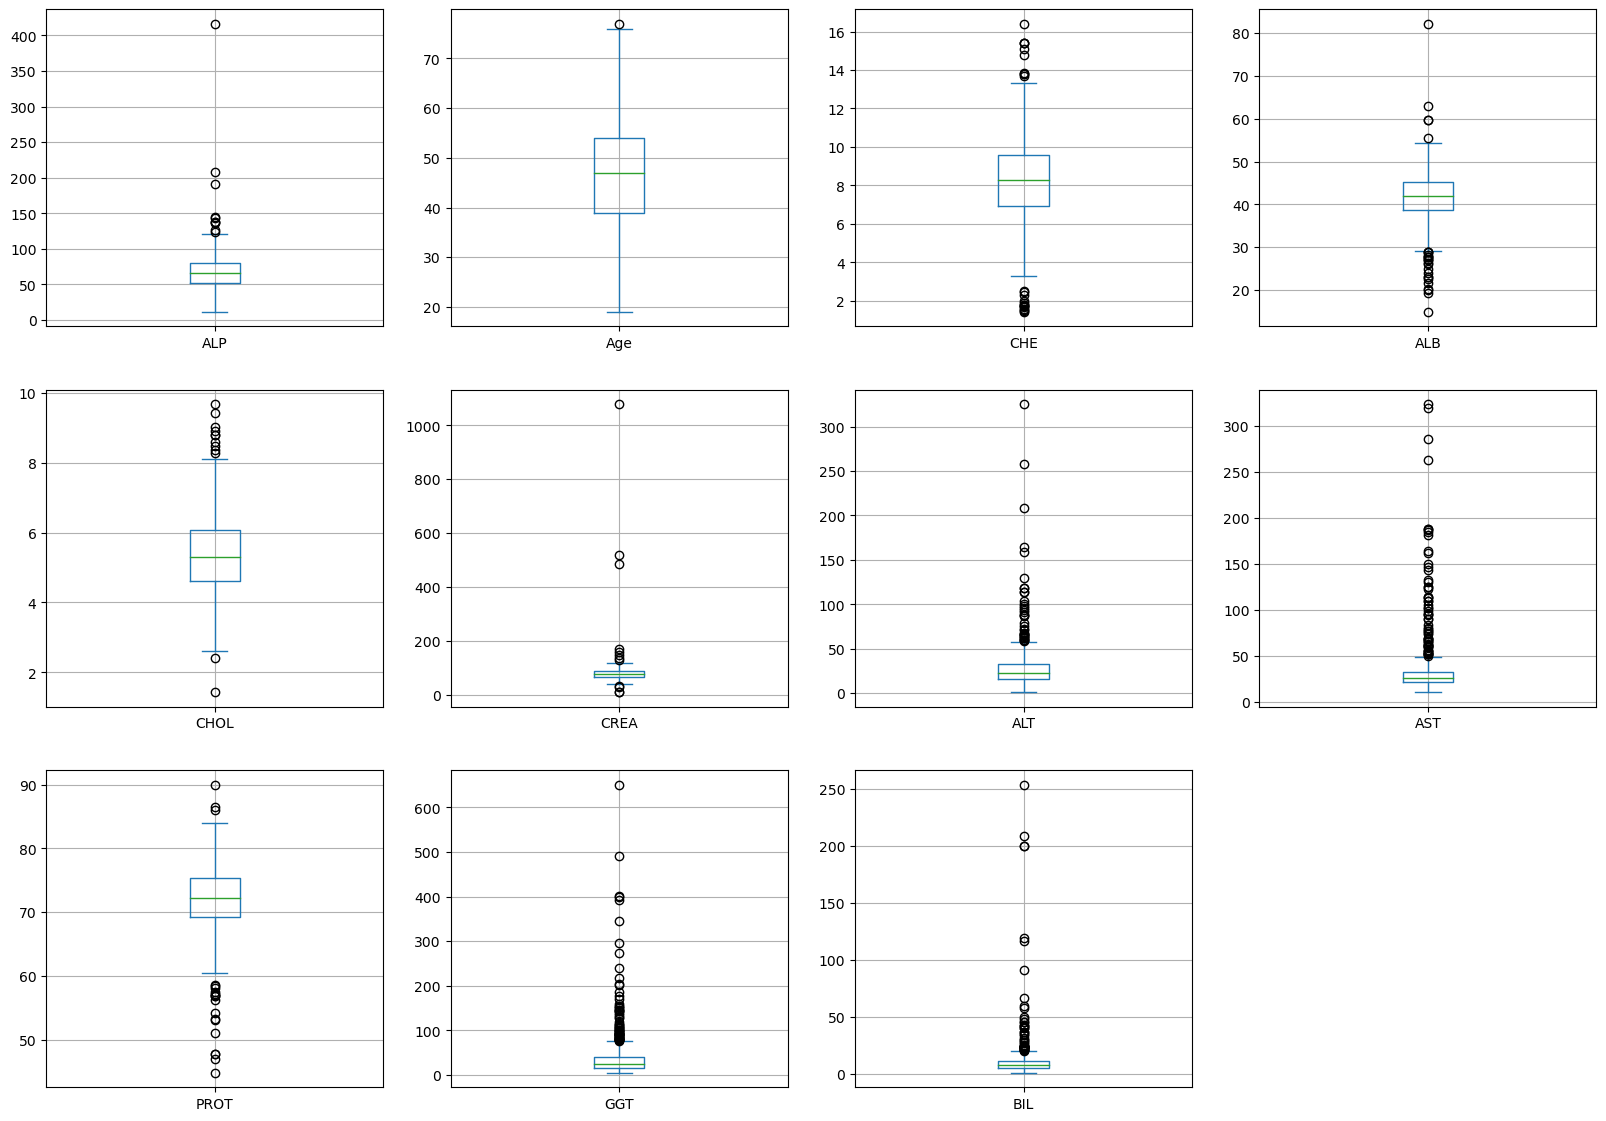

In [15]:
df[numerical].plot(kind='box',
                  grid=True,
                  subplots=True,
                  figsize=(20,14),
                  layout=(3,4))
plt.show()

In [16]:
df[numerical].isna().any()

ALP      True
Age     False
CHE     False
ALB      True
CHOL     True
CREA    False
ALT      True
AST     False
PROT     True
GGT     False
BIL     False
dtype: bool

In [17]:
df[numerical].isna().sum(axis=0)

ALP     18
Age      0
CHE      0
ALB      1
CHOL    10
CREA     0
ALT      1
AST      0
PROT     1
GGT      0
BIL      0
dtype: int64

In [18]:
df['CHOL'].value_counts()

CHOL
5.07    8
5.10    8
5.30    7
5.73    6
5.90    6
       ..
6.40    1
3.69    1
6.89    1
5.60    1
3.63    1
Name: count, Length: 313, dtype: int64

In [19]:
print(df['CHOL'].mean())
print(df['ALP'].mean())

5.368099173553719
68.28391959798995


In [20]:
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df[numerical]

,ALP,Age,CHE,ALB,CHOL,CREA,ALT,AST,PROT,GGT,BIL
0,52.50000,32,6.93,38.5,3.23,106.0,7.7,22.1,69.0,12.1,7.5
1,70.30000,32,11.17,38.5,4.80,74.0,18.0,24.7,76.5,15.6,3.9
2,74.70000,32,8.84,46.9,5.20,86.0,36.2,52.6,79.3,33.2,6.1
3,52.00000,32,7.33,43.2,4.74,80.0,30.6,22.6,75.7,33.8,18.9
4,74.10000,32,9.15,39.2,4.32,76.0,32.6,24.8,68.7,29.9,9.6
...,...,...,...,...,...,...,...,...,...,...,...
610,416.60000,62,5.57,32.0,6.30,55.7,5.9,110.3,68.5,650.9,50.0
611,102.80000,64,1.54,24.0,3.02,63.0,2.9,44.4,71.3,35.9,20.0
612,87.30000,64,1.66,29.0,3.63,66.7,3.5,99.0,82.0,64.2,48.0
613,68.28392,46,3.56,33.0,4.20,52.0,39.0,62.0,71.0,50.0,20.0


In [21]:
df[numerical].isna().any()

ALP     False
Age     False
CHE     False
ALB      True
CHOL    False
CREA    False
ALT      True
AST     False
PROT     True
GGT     False
BIL     False
dtype: bool

In [22]:
df[numerical].isna().sum(axis=0)

ALP     0
Age     0
CHE     0
ALB     1
CHOL    0
CREA    0
ALT     1
AST     0
PROT    1
GGT     0
BIL     0
dtype: int64

In [23]:
from sklearn.impute import SimpleImputer
numerical_imp= SimpleImputer(strategy='most_frequent')
df[['ALT', 'PROT', 'ALB']]= numerical_imp.fit_transform(df[['ALT', 'PROT', 'ALB']])

In [24]:
df[numerical].isna().sum(axis=0)

ALP     0
Age     0
CHE     0
ALB     0
CHOL    0
CREA    0
ALT     0
AST     0
PROT    0
GGT     0
BIL     0
dtype: int64

In [25]:
df[nominal].value_counts()

Sex
m      377
f      238
Name: count, dtype: int64

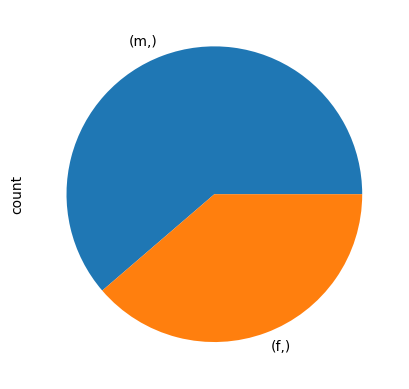

In [26]:
df[nominal].value_counts().plot(kind='pie', grid=True)
plt.show()

In [27]:
df['Category'].value_counts()

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

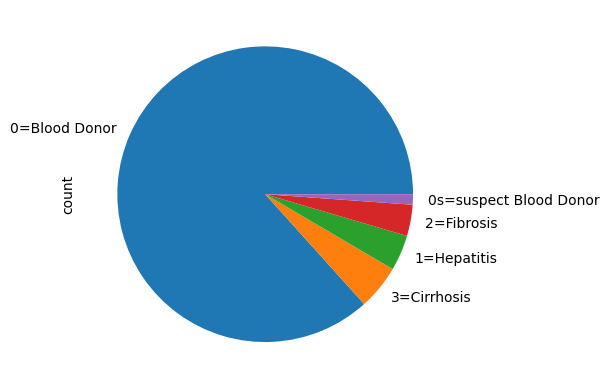

In [28]:
df['Category'].value_counts().plot(kind='pie')
plt.show()

<Axes: xlabel='Category', ylabel='Count'>

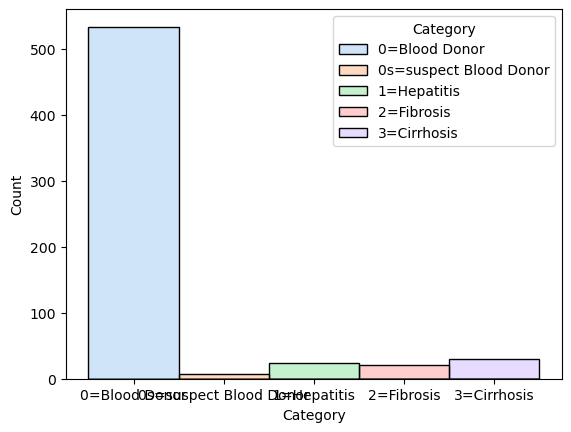

In [29]:
sns.histplot(data=df, x='Category', hue='Category', palette='pastel')

# 3. Perform the required data preprocessing steps 
- obtain a numeric representation of the categorical variables.



In [30]:
# TODO
df[nominal]

,Sex
0,m
1,m
2,m
3,m
4,m
...,...
610,f
611,f
612,f
613,f


In [31]:
diz_sex= {'m':0, 'f':1}
df['Sex']= df['Sex'].apply(lambda x: diz_sex[x])
df[nominal]

,Sex
0,0
1,0
2,0
3,0
4,0
...,...
610,1
611,1
612,1
613,1


In [32]:
#also i saw that the dataset is not balanced, i will use SMOTE to resample.
X_t, y_t= df.drop(['Category'], axis=1), df['Category']

In [34]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=42)
X1_SMOTE, Y1_SMOTE = sampler.fit_resample(X_t, y_t)
print(pd.Series(Y1_SMOTE).value_counts())

Category
0=Blood Donor             533
0s=suspect Blood Donor    533
1=Hepatitis               533
2=Fibrosis                533
3=Cirrhosis               533
Name: count, dtype: int64


C:\Users\chiar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\chiar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


# 4. Create a new target attribute "**Class**" as follows: (binary attribute representing healthy and diseased patient)
- '0=Blood Donor': 0 --> healthy
- '0s=suspect Blood Donor': 0 --> healthy 
- '1=Hepatitis': 1 --> diseased
- '2=Fibrosis': 1 --> diseased
- '3=Cirrhosis': 1 --> diseased

In [35]:
# TODO
diz_cat= {'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1}
new_target= lambda x: diz_cat[x]
df['Class']= df['Category'].apply(new_target)

In [36]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Class
0,0=Blood Donor,32,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,0=Blood Donor,32,0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,0=Blood Donor,32,0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,0=Blood Donor,32,0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,0=Blood Donor,32,0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,1,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,1
611,3=Cirrhosis,64,1,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1
612,3=Cirrhosis,64,1,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1
613,3=Cirrhosis,46,1,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1


In [37]:
df.drop(['Category'], axis=1, inplace=True)
df

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Class
0,32,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,32,0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,32,0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,32,0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,32,0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,1,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,1
611,64,1,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1
612,64,1,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1
613,46,1,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1


In [39]:
X= df.drop(['Class'], axis=1)
y= df['Class'] 

In [48]:
y

0      0
1      0
2      0
3      0
4      0
      ..
610    1
611    1
612    1
613    1
614    1
Name: Class, Length: 615, dtype: int64

# 5. Carry out a **classification analysis** aimed at predicting the **Class** value (healthy or diseased) considering the following setting
- Apply a 5-fold cross-validation procedure on the dataset to identify the most suitable classifier among the following:
    - DecisionTree classifier (default parameters)
    - RandomForest classifier (default parameters)
    - RandomForest classifier (default parameters) after rebalancing with RandomOverSampler 
- Report and discuss the results, motivating the choice of the most suitable model


In [50]:
# TODO
def eval_cross_validation(pipeline, X, y):
    list_df = []
    list_accuracy = []
    for train, val in skf.split(X, y):
        # fit and predict using pipeline
        X_tr = X.values[train]#9 k-1
        y_tr = y.values[train]
        X_val = X.values[val]#1
        y_val = y.values[val]
        pipeline.fit(X_tr,y_tr)
        y_pred = pipeline.predict(X_val)
        # compute classification report
        cr = classification_report(y_val, y_pred, output_dict = True, zero_division = np.nan)
        # store accuracy
        list_accuracy.append(cr['accuracy'])
        # store per-class metrics as a dataframe
        df = pd.DataFrame({k:v for k,v in cr.items() if k!='accuracy'})
        list_df.append(df)
    
    # compute average per-class metrics    
    df_concat = pd.concat(list_df)
    by_row_index = df_concat.groupby(df_concat.index)
    df_avg = by_row_index.mean().round(3)

    # compute average accuracy
    accuracy_avg = np.mean(list_accuracy)
    
    return df_avg, accuracy_avg

In [51]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, make_scorer, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

accuracy 0.9430894308943089


,0,1,macro avg,weighted avg
f1-score,0.967,0.773,0.870,0.944
precision,0.972,0.750,0.861,0.945
recall,0.963,0.800,0.881,0.943
support,108.000,15.000,123.000,123.000


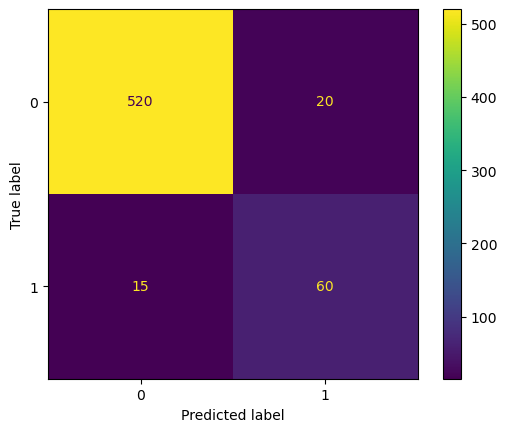

In [52]:
estimators=[('missing', SimpleImputer(missing_values= np.nan, strategy= 'most_frequent')),
            ('scaler', StandardScaler()),
            ('clf', DecisionTreeClassifier(random_state=123))]

pipe_dt= Pipeline(estimators)
df_metrics, acc= eval_cross_validation(pipe_dt, X, y)

print('accuracy', acc)
display(df_metrics)
y_pred=cross_val_predict(pipe_dt, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.show()

In [53]:
print(acc)

0.9430894308943089


In [67]:
dt= cross_val_score(pipe_dt, X, y, scoring=make_scorer(f1_score, pos_label=1), cv=skf)
dt, dt.mean()        

(array([0.66666667, 0.8       , 0.77419355, 0.78787879, 0.83870968]),
 0.7734897360703814)

Acuracy is:  0.9691056910569106


,0,1,macro avg,weighted avg
f1-score,0.983,0.864,0.923,0.968
precision,0.975,0.927,0.951,0.969
recall,0.991,0.813,0.902,0.969
support,108.000,15.000,123.000,123.000


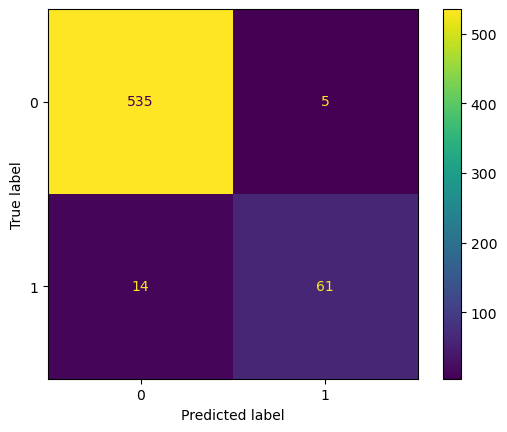

In [56]:
estimators= [('missing', SimpleImputer(strategy= 'most_frequent')),
            ('scaling', StandardScaler()),
            ('clf', RandomForestClassifier(random_state=42))]
pipe_rf= Pipeline(estimators)
df_metrics, acc= eval_cross_validation(pipe_rf, X, y)

print('Acuracy is: ', acc)
display(df_metrics)
y_pred= cross_val_predict(pipe_rf, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred)

In [58]:
rf= cross_val_score(pipe_rf, X, y, scoring= make_scorer(f1_score, pos_label=1), cv=skf)
rf, rf.mean()

(array([0.76923077, 0.89655172, 0.89655172, 0.86666667, 0.88888889]),
 0.8635779546124374)

Accuracy is:  0.9972222222222221


,0,1,macro avg,weighted avg
f1-score,0.997,0.997,0.997,0.997
precision,1.000,0.995,0.997,0.997
recall,0.994,1.000,0.997,0.997
support,108.000,108.000,216.000,216.000


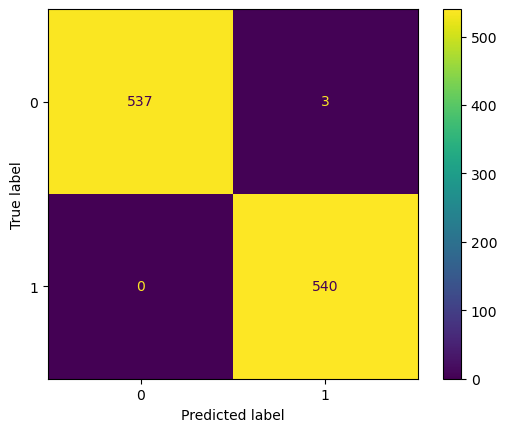

In [64]:
from imblearn.over_sampling import RandomOverSampler
sampler= RandomOverSampler(random_state=42)
X_s, y_s= sampler.fit_resample(X, y)

estimators=[('missing', SimpleImputer(strategy='most_frequent')),
            ('scaling', StandardScaler()),
            ('clf', RandomForestClassifier(random_state=123))]

pipe_sampl= Pipeline(estimators)
df_metrics, acc= eval_cross_validation(pipe_sampl, X_s, y_s)

print('Accuracy is: ', acc)
display(df_metrics)
y_pred= cross_val_predict(pipe_sampl, X_s, y_s, cv=skf)
ConfusionMatrixDisplay.from_predictions(y_s, y_pred)

In [65]:
sampl_rf= cross_val_score(pipe_rf, X_s, y_s, scoring=make_scorer(f1_score, pos_label=1), cv=skf)
sampl_rf, sampl_rf.mean()

(array([1.        , 1.        , 0.99082569, 0.99539171, 0.99539171]),
 0.9963218196423288)

In [68]:
evaluation_results= pd.DataFrame({'dt': dt, 'rf': rf, 'sampled_rf': sampl_rf})
evaluation_results

,dt,rf,sampled_rf
0,0.666667,0.769231,1.000000
1,0.800000,0.896552,1.000000
2,0.774194,0.896552,0.990826
3,0.787879,0.866667,0.995392
4,0.838710,0.888889,0.995392


Text(0, 0.5, 'f1-score')

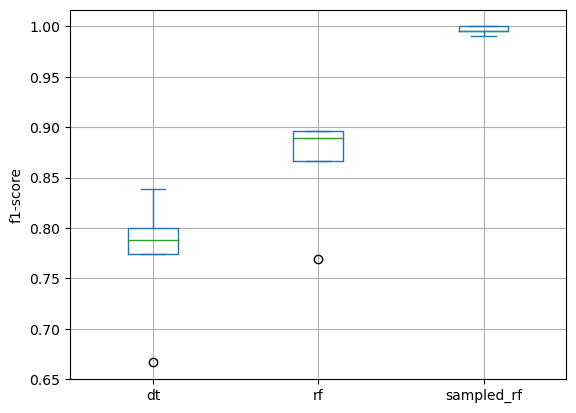

In [73]:
evaluation_results.plot(kind='box', grid=True).set_ylabel('f1-score')

By comparing the accuracy score and the f1-score metrics, Random Forest Classifier, after resampling through RandomOverSampler, is the most suitable classifier. 

In [72]:
#Statistical comparison
from scipy.stats import wilcoxon
print(wilcoxon(evaluation_results.dt, evaluation_results.rf))
print(wilcoxon(evaluation_results.dt, evaluation_results.sampled_rf))
print(wilcoxon(evaluation_results.sampled_rf, evaluation_results.rf))

WilcoxonResult(statistic=0.0, pvalue=0.0625)
WilcoxonResult(statistic=0.0, pvalue=0.0625)
WilcoxonResult(statistic=0.0, pvalue=0.0625)


In all 3 cases we have a p-value> alpha (arbitrarly chosen to be 0.05), meaning that all the samples belong to the same distribution (we accept H0 with a confidence level of alpha).

# Exam Delivery
- Save the current file 
- Click "**Restart & Run All**" and check consistency (no error, expected results)
- Export using
     - "**File**" --> "**Download as**" --> "**HTML (.html)**"
- Rename the files as follows and upload in MS Teams Assignment
     - HTML: *Surname_Name_StudentNumber.html*
     - IPYNB: *Surname_Name_StudentNumber.ipynb* 
